## # 신경망 구성 (1) 개요

### 가장 흔한 예제인 MNIST 다시 보기
> - 코드 몇 줄로 정확도 97%의 분류기를 만들 수 있다.  
> - 또한 여기에는 이미지 분류에 특호된 Conv2D 레이어가 없고, 다층 퍼셉트론(Multi-Layer-Perceptron)으로만 이루어져 있다.  

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8319 - accuracy: 0.8094
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2407 - accuracy: 0.9308
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1818 - accuracy: 0.9478
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1488 - accuracy: 0.9576
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1299 - accuracy: 0.9629
Epoc

### Numpy로 MLP 기반 딥러닝 모델 만들어 보기

In [3]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [9]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([ 6.34081808e-01,  9.99764838e-02,  1.59883946e-01, -9.38411416e-01,
        6.19344797e-01, -6.30136947e-01,  2.32132003e-01,  4.28541523e-01,
       -8.72904863e-02, -5.64708936e-01,  4.69065918e-01,  2.18260695e-01,
       -6.77655913e-01, -2.75638857e-01, -1.38632387e+00,  1.34360561e-03,
       -3.79925354e-01, -1.13151679e+00,  2.04966645e-01,  1.07083987e+00,
        1.56769115e-01,  8.67232815e-02,  1.20294007e+00,  8.45160883e-01,
        1.11978838e+00,  1.29101209e-01, -2.36026028e-01,  6.35916295e-01,
       -1.65547260e+00, -2.70296599e+00, -5.19223850e-01,  2.01331761e+00,
       -1.77342429e-01,  1.45411159e-01,  1.23637573e+00,  8.89331580e-01,
       -9.60317711e-01, -6.05859102e-01, -1.99299936e+00, -1.74075996e+00,
        8.29763153e-02,  3.23347154e-02,  6.76493426e-01, -4.71212577e-01,
       -2.03138585e-01, -1.04579231e+00, -5.22504251e-03,  7.56942242e-01,
        6.96339525e-02,  2.11337392e-01])

## # 신경망 구성 (2) 활성화 함수와 손실 함수

> 위에서 은닉층으로 오는 input에 sigmoid 함수 쓰기

### # 활성화 함수

In [10]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.65341442 0.52497332 0.53988606 0.28122134 0.65006952 0.34747949
 0.5577738  0.60552534 0.47819122 0.3624586  0.61516265 0.55434959
 0.33678468 0.43152329 0.19999528 0.5003359  0.4061449  0.24388129
 0.55106302 0.7447566  0.53911221 0.52166724 0.76904739 0.69955104
 0.75394946 0.53223055 0.4412659  0.65382975 0.16037068 0.06279857
 0.37303374 0.88218827 0.45578023 0.53628887 0.77493253 0.70875221
 0.27681459 0.35300437 0.11993991 0.14921643 0.52073218 0.50808297
 0.66295562 0.38432928 0.44938927 0.26003391 0.49869374 0.68068949
 0.51740146 0.55263858]


In [11]:
# 그리고 Dense 레이어가 나오는데, 이것을 구현함
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [12]:
# 윗 함수 다시 구현
# 입력 -> 은닉 -> 출력의 활성화 함수 전까지
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.86076203 -0.25466564  0.0982923  -0.31694162  0.28814521 -0.15172322
  0.28185494  0.24985275  0.58670591  0.04540416]


In [13]:
W2.shape

(50, 10)

In [14]:
# 출력 전에 활성화 함수로 softmax 줘보기
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0) # DJ 추가 # 여기서는 각 데이터마다 갖는 feature 값 중 최대를 빼는데 그럼 음수도 생김
        y = np.exp(x) / np.sum(np.exp(x), axis=0) # DJ 추가 # 그러나 exp()에 음수들 어가도 되서 괜찮고
                                                  # 여기서는 데이터를 구분하는 축에 따라 sum()한 값이 결국 '/' 할 때는 브로드캐스팅 됨
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [15]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.03960368, 0.07260388, 0.10333501, 0.06822031, 0.12493945,
       0.08047614, 0.12415601, 0.12024565, 0.16840805, 0.09801183])

### # 손실함수 (Loss Functions)


In [16]:
# 우선 정답이 맞는지 라벨을 통해 확인해보기
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1 # DJ 추가 # 맨 처음 데이터수 x 카테고리 수 shape의 0행렬을 만든다.
                        # 그리고 결국 정답 integer를 0행렬 각 row의 인덱스로 넣으면서 그 자리에 1을 할당하는 것
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

--------------------------------------------------------------------------------------

In [17]:
t.shape

(5, 10)

In [21]:
y_train.shape

(60000,)

In [22]:
Y_digit.shape

(5,)

In [23]:
Y_digit.size

5

In [26]:
np.zeros((5, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
count = 0
for i, v in enumerate(np.zeros((5, 10))):
    print(i, v)
    count += 1
    if count == 5:
        break

0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
Y_digit

array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
Y_digit[0]

5

-------------------------------------------------------------------------

#### continued..

In [31]:
# 실제 값과 확인
print(y_hat[0])
print(t[0])

[0.03960368 0.07260388 0.10333501 0.06822031 0.12493945 0.08047614
 0.12415601 0.12024565 0.16840805 0.09801183]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


> 아직 확률이 정확하지 않음...

In [32]:
# 손실 함수 넣기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
                         # 이 바로 윗 부분이 잘 이해 안 갔는데, integer array indexing이다.
                         # 전체 데이터 갯수에서 t, 즉 제일 확률이 높은 열 인덱스 값을 가져온다.
                         # batch_size로 나눠주는 건 데이터마다의 손실함수 값을 주

Loss = cross_entropy_error(y_hat, t)
Loss

2.593189765081021

-----------------------------------------------------------------------

In [37]:
t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [41]:
t.argmax(axis=1)

array([5, 0, 4, 1, 9])

In [39]:
y_hat

array([[0.03960368, 0.07260388, 0.10333501, 0.06822031, 0.12493945,
        0.08047614, 0.12415601, 0.12024565, 0.16840805, 0.09801183],
       [0.03903497, 0.05991991, 0.10358   , 0.08502322, 0.11789689,
        0.08193655, 0.12466677, 0.14342779, 0.13848516, 0.10602875],
       [0.04127167, 0.06946645, 0.08952505, 0.06370002, 0.11141347,
        0.09038227, 0.12690006, 0.14521688, 0.14937674, 0.1127474 ],
       [0.04435092, 0.06721695, 0.10522656, 0.07203785, 0.10506611,
        0.07721062, 0.13533711, 0.14410762, 0.16149253, 0.08795374],
       [0.04063413, 0.07758915, 0.09443401, 0.1038031 , 0.11279805,
        0.07368765, 0.1274409 , 0.10829237, 0.16191237, 0.09940828]])

In [42]:
y_hat.shape

(5, 10)

In [44]:
y_hat[np.arange(5), t.argmax(axis=1)]

array([0.08047614, 0.03903497, 0.11141347, 0.06721695, 0.09940828])

In [47]:
np.log(y_hat[np.arange(5), t.argmax(axis=1)])

array([-2.51979453, -3.24329747, -2.19450707, -2.6998299 , -2.30851986])

In [48]:
np.sum(np.log(y_hat[np.arange(5), t.argmax(axis=1)]))

-12.965948825405105

In [49]:
-np.sum(np.log(y_hat[np.arange(5), t.argmax(axis=1)])) / 5

2.593189765081021

-----------------------------------------------------------------------

### # Gradient Descent

In [50]:
# numpy로 Gradient Descent 구현하기
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

# y 가 one-hot encoded vector이고 크로스엔트로피를 손실함수로 갖고 softmax 함수가 중간에 있을 때
# 위와 같은 도함수가 나오는걸 증명한 링크
# https://deepnotes.io/softmax-crossentropy

array([[ 0.00792074,  0.01452078,  0.020667  ,  0.01364406,  0.02498789,
        -0.18390477,  0.0248312 ,  0.02404913,  0.03368161,  0.01960237],
       [-0.19219301,  0.01198398,  0.020716  ,  0.01700464,  0.02357938,
         0.01638731,  0.02493335,  0.02868556,  0.02769703,  0.02120575],
       [ 0.00825433,  0.01389329,  0.01790501,  0.01274   , -0.17771731,
         0.01807645,  0.02538001,  0.02904338,  0.02987535,  0.02254948],
       [ 0.00887018, -0.18655661,  0.02104531,  0.01440757,  0.02101322,
         0.01544212,  0.02706742,  0.02882152,  0.03229851,  0.01759075],
       [ 0.00812683,  0.01551783,  0.0188868 ,  0.02076062,  0.02255961,
         0.01473753,  0.02548818,  0.02165847,  0.03238247, -0.18011834]])

> 여기서 dy란 $\frac{\partial Loss}{\partial y}$  
> dy를 구하면 다른 건 chain rule 로 구할 수 있다.  

In [56]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.10296166, -0.09027263,  0.06792929,  0.05247001, -0.05379362,
        -0.11764271,  0.08693793,  0.09027262,  0.10668978, -0.03962901],
       [-0.06746099, -0.09837717,  0.04451733,  0.03482952,  0.00391231,
        -0.06177022,  0.0567224 ,  0.05833033,  0.06949585, -0.04019938],
       [-0.11949504, -0.06373423,  0.06266159,  0.04988737, -0.05499871,
        -0.07425048,  0.08050852,  0.08360286,  0.09809712, -0.062279  ],
       [-0.02845243, -0.05266473,  0.03484133,  0.02655173, -0.09043075,
        -0.0272896 ,  0.0457762 ,  0.04850376,  0.0555439 , -0.01237941],
       [-0.13283476, -0.07968699,  0.06097088,  0.04829713,  0.01258809,
        -0.10372111,  0.07711427,  0.07934942,  0.09451258, -0.05658951],
       [-0.0639509 , -0.03451187,  0.03481476,  0.02779659, -0.0269664 ,
        -0.04468536,  0.04470012,  0.04622336,  0.05459993, -0.03802022],
       [-0.0908246 , -0.09010187,  0.06059081,  0.04636508, -0.04638948,
        -0.10762128,  0.07744818,  0.08064383

In [57]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [58]:
# 중간에 sigmoid도 한 번 사용됐으니
# 이에 대한 gradient도 구해야 함
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [59]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [60]:
# learning rate도 고려한
# 파라미터 업데이트 함수

learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

### # Backpropagation

In [61]:
# 역전파를 통해 미분 계수 구하는 함수
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [66]:
# 이로서 순전파, 역전파를 통해
# 파라미터가 업데이틑 과정을 아래의 코드로 구현함

# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07024955 0.09734939 0.09060088 0.12063172 0.11840632 0.0768448
  0.10088194 0.07672158 0.12693046 0.12138337]
 [0.08362928 0.08721015 0.07151939 0.12208646 0.12634531 0.0868721
  0.0960289  0.08992881 0.12125131 0.11512829]
 [0.08540055 0.0896849  0.06768838 0.09804973 0.13539394 0.08723975
  0.11450589 0.07778957 0.11674581 0.12750148]
 [0.07959859 0.08521269 0.07833179 0.11815262 0.14388454 0.07651292
  0.10215738 0.09280785 0.11506022 0.10828139]
 [0.08208761 0.08450531 0.07438452 0.10736445 0.15643022 0.06968551
  0.09872937 0.09272951 0.10886535 0.12521816]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3174396970653164


> 실험해봤는데 위에서 initialising 하는 부분 빼고 코드를 반복해서 실행하면  
> Loss가 줄어드는 것을 볼 수 있다.

## # 모델 학습 step-by-step

- 모델이 학습해가는 과정을 5번 반복해서 실제 loss가 줄어드는지 확인한다.

In [67]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [68]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.08527203 0.07994717 0.11869815 0.07021829 0.15548542 0.09905219
  0.06070831 0.14202441 0.14137745 0.04721659]
 [0.0901562  0.07235708 0.13928587 0.08624665 0.12868083 0.09120542
  0.06758216 0.13218067 0.14475491 0.04755021]
 [0.08385518 0.06449953 0.14237863 0.07363839 0.15245708 0.0974574
  0.08162625 0.13433735 0.11189395 0.05785625]
 [0.07793474 0.06331486 0.10024005 0.08217073 0.1498699  0.11936635
  0.05531203 0.15148173 0.15391335 0.04639626]
 [0.10217162 0.06915798 0.13440687 0.06378825 0.14859312 0.10664448
  0.06909434 0.15190328 0.10998032 0.04425975]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4953013915468074
---------
[[0.10192466 0.09991016 0.09935188 0.06373496 0.16502791 0.12299631
  0.05572437 0.11620344 0.11595397 0.05917235]
 [0.11338249 0.08918706 0.11850394 0.07939999 0.13934392 0.10799408
  0.06251548 0.10978769 0.1205

## # 추론 과정 구현과 정확도(Accuracy) 계산

In [69]:
# 예측값 주는 함수 만들기
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [70]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.1392747 , 0.15961685, 0.05322276, 0.03992553, 0.15764413,
       0.19465683, 0.03599955, 0.05981824, 0.05938411, 0.1004573 ])

In [72]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x) # 예측된 카테고리별 확률값
    y_hat = np.argmax(y_hat, axis=1)   # 그 확률값 중 제일 높은 걸 라벨 정수로 반환

    accuracy = np.sum(y_hat == y) / float(x.shape[0])  # 맞은 갯수만큼 다 더하고 전체 갯수로 나눈다.
    return accuracy

In [73]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.1392747  0.15961685 0.05322276 0.03992553 0.15764413 0.19465683
 0.03599955 0.05981824 0.05938411 0.1004573 ]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.11


> 5번의 학습으로는 아직 11%의 정확도임

## # 전체 학습 사이클 수행

In [74]:
# 파라미터 초기화 함수
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

> 아래의 코드는 GPU를 사용하는 게 아니어서 오래 걸림

In [75]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # DJ 추가 # np.arange(60000) 중에서 100개 뽑아내기
    x_batch = x_train_reshaped[batch_mask] # DJ - (60000, 784)에서 (100,784), 즉 데이터(행)가 뽑힘
    y_batch = y_train[batch_mask] # DJ - 동일함
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False) # DJ - 1 iteration

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:  # DJ - 50000번 반복되는데, 600번마다 기록을 남김
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.300419832301038
train acc, test acc | 0.11236666666666667, 0.1135
Loss:  0.8619931104840401
train acc, test acc | 0.7841833333333333, 0.7902
Loss:  0.6244740794365812
train acc, test acc | 0.8769333333333333, 0.8831
Loss:  0.3061103958236115
train acc, test acc | 0.8997833333333334, 0.9024
Loss:  0.45359572322850705
train acc, test acc | 0.9072, 0.9115
Loss:  0.29885723332490416
train acc, test acc | 0.9141833333333333, 0.9179
Loss:  0.1926438164189583
train acc, test acc | 0.9186833333333333, 0.9215
Loss:  0.25909351867185315
train acc, test acc | 0.9240833333333334, 0.9254
Loss:  0.18691661079180688
train acc, test acc | 0.9274666666666667, 0.9289
Loss:  0.3719530897305575
train acc, test acc | 0.9304166666666667, 0.9333
Loss:  0.24926630635498248
train acc, test acc | 0.9335666666666667, 0.9361
Loss:  0.09826880750504101
train acc, test acc | 0.9357666666666666, 0.9385
Loss:  0.16780735238824762
train acc, test acc | 0.9386333333333333, 0.9399

> 위의 과정을 요약하면,  
> - 60000개의 데이터에서  
> - 미니배치로 100개씩 랜덤으로 뽑는데(중복 허용)
> - 50000번을 학습해볼 거임  
> - 근데 600번째마다 기록을 남길 것이다.
> - 즉 랜덤으로 뽑힌 100개의 데이터로 50000번 학습을 돌려볼 것이다.

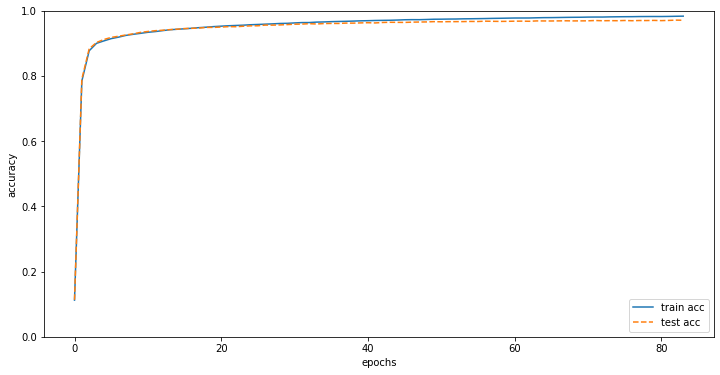

In [93]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

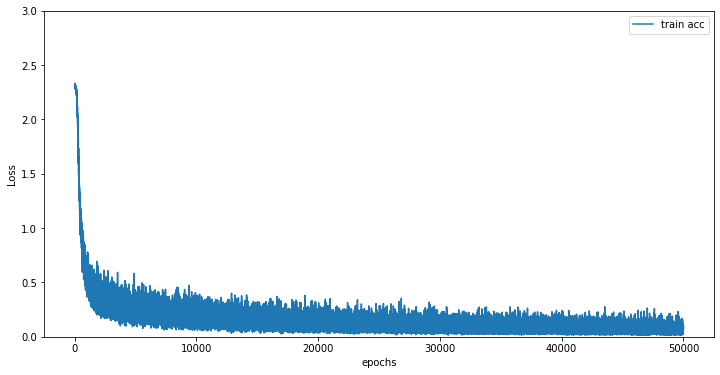

In [94]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()

> loss는 50000번의 학습 내내 리스트에 추가했고,  
> accuracy는 600번째마다만 해서  
> x축 값이 loss 그래프와 accuracy 그래프가 다르다